## Plot chains 

Notebook to plot chains run sampler object using chainconsumer

In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

In [2]:
sampler_z_full = emcee_sampler.EmceeSampler(read_chain_file=2)
sampler_single_full = emcee_sampler.EmceeSampler(read_chain_file=1)
sampler_single_full_lownoise = emcee_sampler.EmceeSampler(read_chain_file=8)

Loading emulator using a specific arxiv, not the one set in basedir


 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (330000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (395000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (380000, 6)


In [3]:
chain_z_full,lnprob_z_full=sampler_z_full.get_chain(cube=False)
chain_single_full,lnprob_single_full=sampler_single_full.get_chain(cube=False)
chain_single_full_lownoise,lnprob_single_full_lownoise=sampler_single_full_lownoise.get_chain(cube=False)

In [ ]:
## Function for prior
sigma=0.15
def prior(x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp((x-1)/(2*sigma**2))
    

In [ ]:
## Generate prior data
x=np.linspace(0.5,1.5,500)
y=prior(x)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


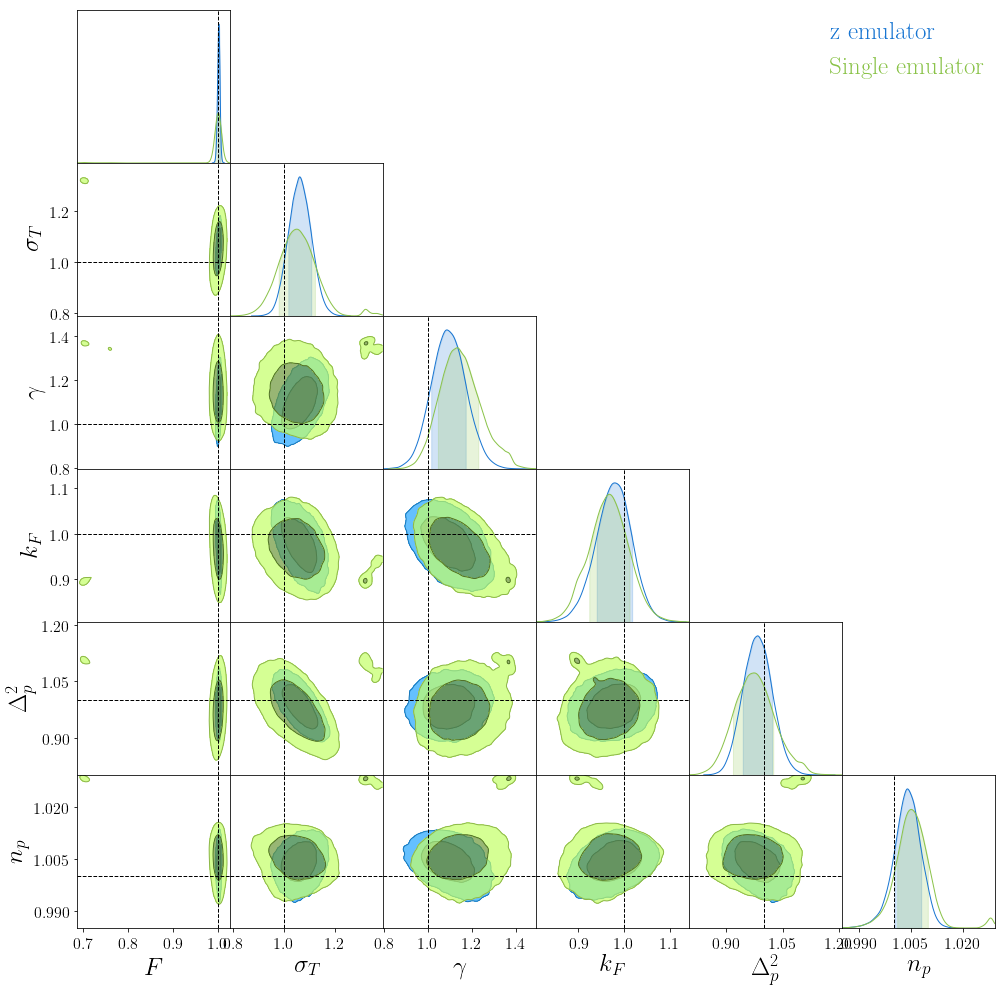

In [4]:
c=ChainConsumer()
c.add_chain(chain_z_full,parameters=sampler_z_full.paramstrings,name="z emulator")
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="Single emulator")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_z_full.truth)
#fig.axes[0].plot(x,y,linestyle="solid")
fig.show()

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


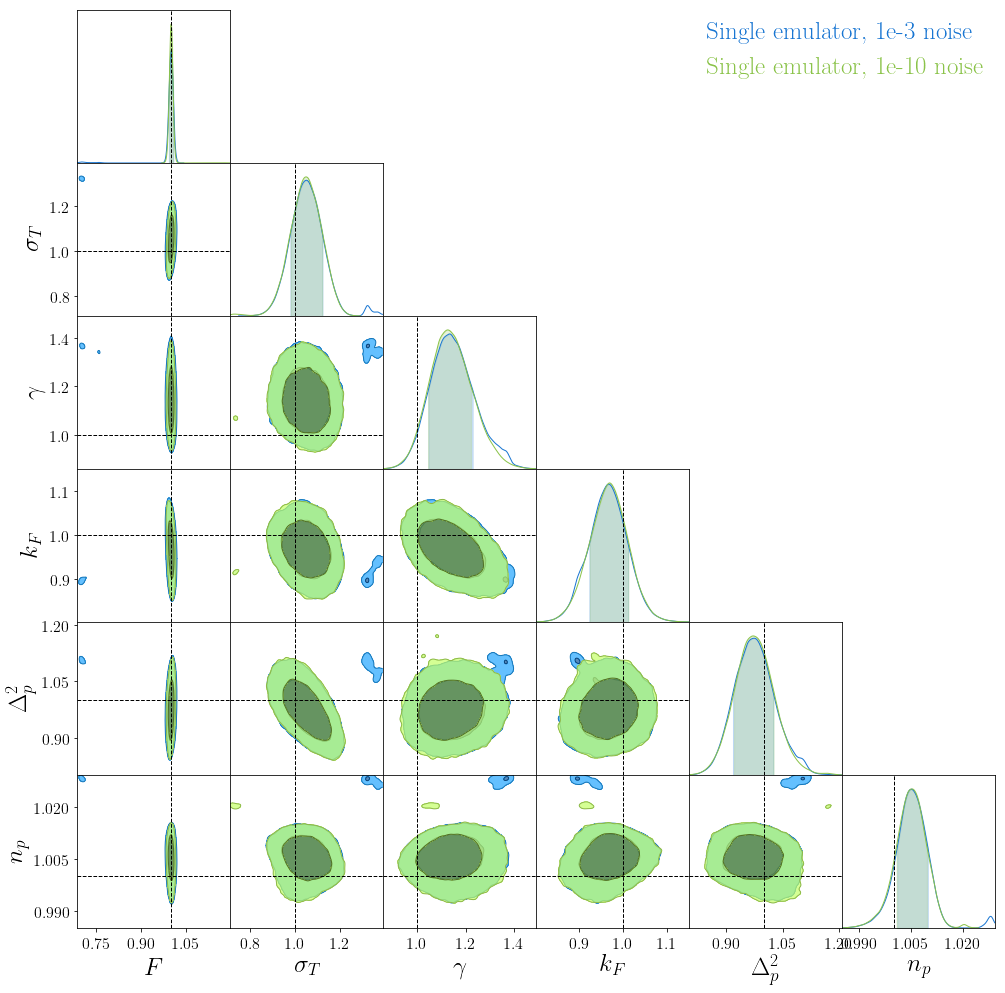

In [5]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="Single emulator, 1e-3 noise")
c.add_chain(chain_single_full_lownoise,parameters=sampler_single_full_lownoise.paramstrings,name="Single emulator, 1e-10 noise")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_z_full.truth)
#fig.axes[0].plot(x,y,linestyle="solid")
fig.show()

In [24]:
np.argmin(chain_single_full_lownoise,axis=0)

array([205463,  49184, 142262, 288682,  94623, 112059])

In [26]:
np.argmax(chain_single_full_lownoise,axis=0)

array([  6434, 282027,   8064, 363639,  72939, 102434])

In [25]:
chain_single_full_lownoise[205463]

array([0.96230372, 0.93309471, 1.17313312, 0.92248783, 0.82766219,
       0.99250059])

In [27]:
sampler_single_nokf = emcee_sampler.EmceeSampler(read_chain_file=3)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (325000, 5)


In [28]:
chain_single_nokf,lnprob_single_nof=sampler_single_nokf.get_chain(cube=False)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


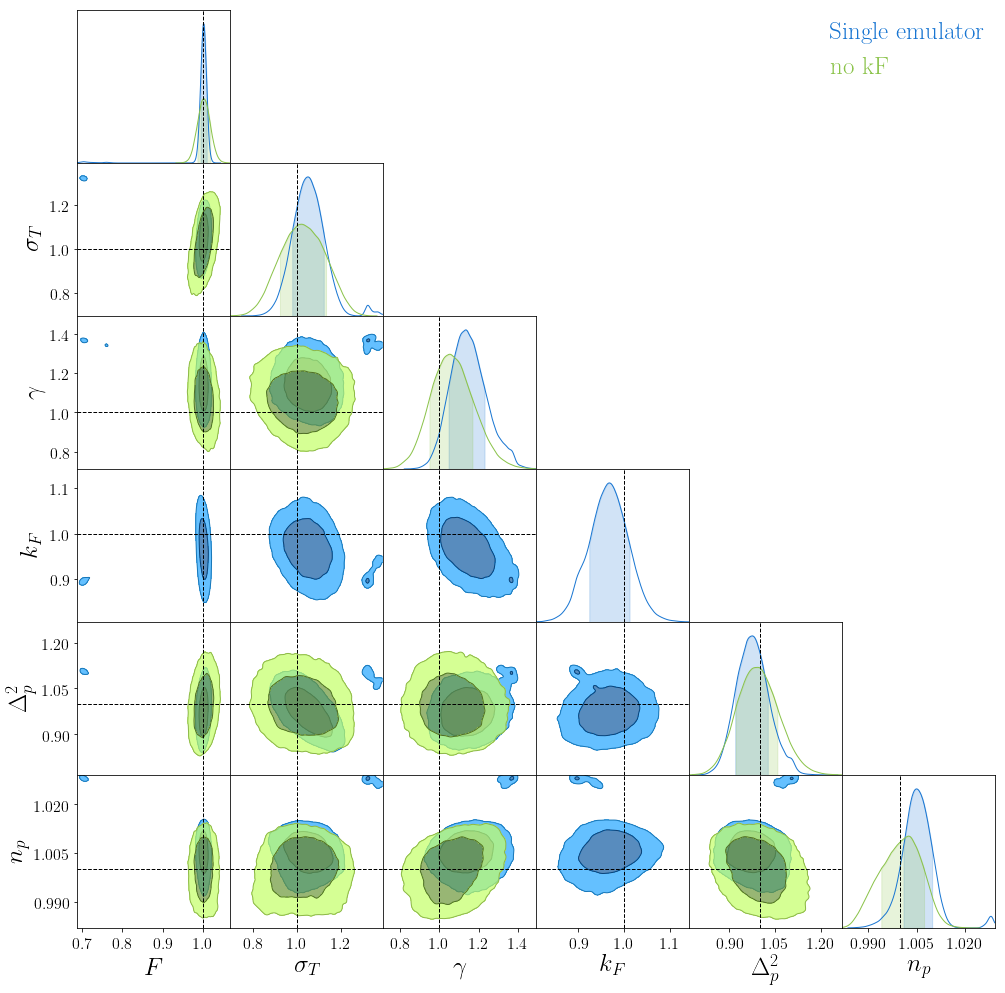

In [30]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="Single emulator")
c.add_chain(chain_single_nokf,parameters=sampler_single_nokf.paramstrings,name="no kF")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_z_full.truth)
#fig.axes[0].plot(x,y,linestyle="solid")
fig.show()
fig.savefig("sampler.pdf")